In [68]:
# Set-Ups
import csv
import math
import random
import string
import numpy as np
import pandas as pd 
import pylab as plt

# Load the data
df = pd.read_csv("train.csv", sep=",",skipinitialspace = True)
#df = pd.read_csv("framingham.csv", sep=",")
## data split
from sklearn.model_selection import train_test_split

df = df.dropna()
df = df.drop(columns=['Track Name'])
df["Artist Name"] = df["Artist Name"].astype(str)

from sklearn import preprocessing
number = preprocessing.LabelEncoder()
df["Artist Name"] = number.fit_transform(df["Artist Name"])

df_X = df[df.columns[df.columns != 'Class']].copy()
df_y = df['Class'].copy()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(X_test))

Number of training instances:  9450 
Number of test instances:  2363


In [34]:
df_X.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,789,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4
2,5786,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4
4,4597,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4
5,5834,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4
6,5158,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4


In [20]:
df_y = df_y.astype(str)
df_y

0         5
1        10
2         6
3         5
4        10
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 17996, dtype: object

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=None)
dt_model = dt.fit(X_train,y_train)
print('Decision Tree accuracy for training set: %f' % dt_model.score(X_train, y_train))
print('Decision Tree accuracy for test set: %f' % dt_model.score(X_test, y_test))

Decision Tree accuracy for training set: 0.914074
Decision Tree accuracy for test set: 0.336437


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None)
clf.fit(X_train,y_train)

print('Random forest accuracy for training set: %f' % clf.score(X_train, y_train))
print('Random forest accuracy for test set: %f' % clf.score(X_test, y_test))

Random forest accuracy for training set: 0.914074
Random forest accuracy for test set: 0.481168


In [70]:
# XGBoosting Set-Ups
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='multi:softmax', n_estimators=2, seed=4212)
xg_cl.fit(X_train,y_train)

print('GBDT accuracy for training set: %f' % xg_cl.score(X_train, y_train))
print('GBDT forest accuracy for test set: %f' % xg_cl.score(X_test, y_test))

[22:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
GBDT accuracy for training set: 0.569630
GBDT forest accuracy for test set: 0.494710


C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\92503\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas

In [38]:
df_X = df[df.columns[df.columns != 'Class']].copy()
df_y = df['Class'].copy()

x_train, x_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.30, random_state=4212)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.50, random_state=4212)

# Transfer data
x_train = x_train.to_numpy()
y_train = y_train.to_numpy().squeeze()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy().squeeze()
x_val = x_val.to_numpy()
y_val = y_val.to_numpy().squeeze()

In [50]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

# Use Default option to test TabNet
clf1 = TabNetClassifier()
clf1.fit(x_train,y_train,max_epochs=1000)

Device used : cpu
epoch 0  | loss: 2.55623 | val_0_accuracy: 0.05079 |  0:00:00s
epoch 1  | loss: 2.15257 | val_0_accuracy: 0.06321 |  0:00:00s
epoch 2  | loss: 1.95738 | val_0_accuracy: 0.11061 |  0:00:01s
epoch 3  | loss: 1.83437 | val_0_accuracy: 0.23589 |  0:00:01s
epoch 4  | loss: 1.74954 | val_0_accuracy: 0.29853 |  0:00:02s
epoch 5  | loss: 1.69081 | val_0_accuracy: 0.28499 |  0:00:02s
epoch 6  | loss: 1.65066 | val_0_accuracy: 0.27878 |  0:00:03s
epoch 7  | loss: 1.61509 | val_0_accuracy: 0.30587 |  0:00:03s
epoch 8  | loss: 1.59042 | val_0_accuracy: 0.31038 |  0:00:04s
epoch 9  | loss: 1.57172 | val_0_accuracy: 0.32562 |  0:00:04s
epoch 10 | loss: 1.54484 | val_0_accuracy: 0.3228  |  0:00:05s
epoch 11 | loss: 1.53012 | val_0_accuracy: 0.31659 |  0:00:05s
epoch 12 | loss: 1.52414 | val_0_accuracy: 0.31603 |  0:00:06s
epoch 13 | loss: 1.50571 | val_0_accuracy: 0.30869 |  0:00:06s
epoch 14 | loss: 1.49991 | val_0_accuracy: 0.33352 |  0:00:07s
epoch 15 | loss: 1.48877 | val_0_accu

BEST ACCURACY SCORE ON TRAINING SET : 0.5223122505744346
BEST ACCURACY SCORE ON VALIDATION SET : 0.5067720090293454
BEST ACCURACY SCORE ON TEST SET : 0.47799097065462753


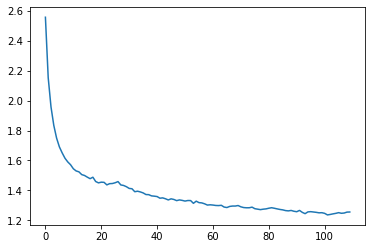

In [58]:
# plot losses
plt.plot(clf1.history['loss'])

# find and plot feature importance
y_pred = clf1.predict(x_test)
clf1.feature_importances_

# determine best accuracy for training set
preds = clf1.predict(x_train)
train_acc = accuracy_score(preds, y_train)

# determine best accuracy for test set
preds = clf1.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON TRAINING SET : {train_acc}")
print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

In [53]:
%%capture
# define the model
clf1_1 = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf1_1.fit(
    x_train,y_train,
    eval_set=[(x_train, y_train), (x_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
) 

BEST ACCURACY SCORE ON TRAINING SET : 0.5286007981618092
BEST ACCURACY SCORE ON VALIDATION SET : 0.45654627539503384
BEST ACCURACY SCORE ON TEST SET : 0.4469525959367946


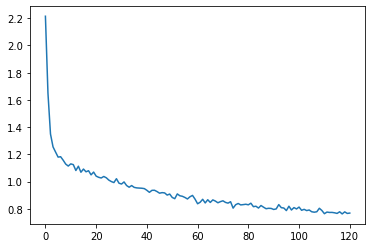

In [57]:
# plot losses
plt.plot(clf1_1.history['loss'])

# find and plot feature importance
y_pred = clf1_1.predict(x_test)
clf1_1.feature_importances_

# determine best accuracy for training set
preds = clf1_1.predict(x_train)
train_acc = accuracy_score(preds, y_train)

# determine best accuracy for test set
preds = clf1_1.predict(x_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_1.predict(x_val)
valid_acc = accuracy_score(preds_valid, y_val)

print(f"BEST ACCURACY SCORE ON TRAINING SET : {train_acc}")
print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

In [61]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(df_X, df_y, test_size=0.20, random_state=4212)

# Transfer data
x_train2 = x_train2.to_numpy()
y_train2 = y_train2.to_numpy().squeeze()
x_test2 = x_test2.to_numpy()
y_test2 = y_test2.to_numpy().squeeze()

In [65]:
# Use Default option to test TabNet
clf2 = TabNetClassifier()
clf2.fit(x_train2,y_train2)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 2.52034 |  0:00:00s
epoch 1  | loss: 2.12615 |  0:00:00s
epoch 2  | loss: 1.9401  |  0:00:01s
epoch 3  | loss: 1.82162 |  0:00:01s
epoch 4  | loss: 1.73627 |  0:00:02s
epoch 5  | loss: 1.70205 |  0:00:02s
epoch 6  | loss: 1.66283 |  0:00:03s
epoch 7  | loss: 1.6222  |  0:00:03s
epoch 8  | loss: 1.58557 |  0:00:04s
epoch 9  | loss: 1.55925 |  0:00:04s
epoch 10 | loss: 1.53451 |  0:00:05s
epoch 11 | loss: 1.5229  |  0:00:05s
epoch 12 | loss: 1.50763 |  0:00:06s
epoch 13 | loss: 1.48811 |  0:00:06s
epoch 14 | loss: 1.487   |  0:00:07s
epoch 15 | loss: 1.4799  |  0:00:07s
epoch 16 | loss: 1.46602 |  0:00:08s
epoch 17 | loss: 1.46567 |  0:00:08s
epoch 18 | loss: 1.4487  |  0:00:09s
epoch 19 | loss: 1.44835 |  0:00:09s
epoch 20 | loss: 1.43628 |  0:00:10s
epoch 21 | loss: 1.42667 |  0:00:10s
epoch 22 | loss: 1.42092 |  0:00:10s
epoch 23 | loss: 1.41275 |  0:00:11s
epoch 24 | loss: 1.41

BEST ACCURACY SCORE ON TRAINING SET : 0.522010582010582
BEST ACCURACY SCORE ON TEST SET : 0.48201438848920863


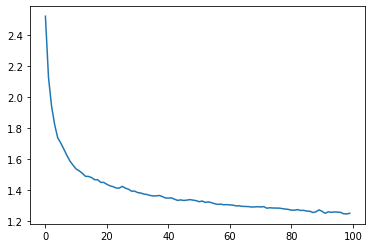

In [66]:
# plot losses
plt.plot(clf2.history['loss'])

# determine best accuracy for training set
preds = clf2.predict(x_train2)
train_acc2 = accuracy_score(preds, y_train2)

# determine best accuracy for test set
preds = clf2.predict(x_test2)
test_acc2 = accuracy_score(preds, y_test2)

print(f"BEST ACCURACY SCORE ON TRAINING SET : {train_acc2}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc2}")